In [3]:
!pip install matplotlib
!pip install matplotlib seaborn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from csv import QUOTE_NONNUMERIC
df=pd.read_csv( "D:/DataScience file/API_SP.POP.TOTL_DS2_en_csv_v2_76253/API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv",skiprows=4,quotechar='"' )
all_columns = df.columns.tolist()
country_names_table = pd.DataFrame(df['Country Name'].unique(), columns=['Country Name'])
display(country_names_table)
# print(df['Country Name'].unique())

Country Name
0                          Aruba
1    Africa Eastern and Southern
2                    Afghanistan
3     Africa Western and Central
4                         Angola
..                           ...
261                       Kosovo
262                  Yemen, Rep.
263                 South Africa
264                       Zambia
265                     Zimbabwe

[266 rows x 1 columns]

In [19]:
Country_name="Zimbabwe"
start_year=1990
end_year=2023
Country_data = df[df['Country Name'] == Country_name]

In [7]:
available_years = [str(year) for year in range(start_year, end_year + 1) ]#if str(year) in Country_data.columns
population_data = Country_data[['Country Name'] + available_years]
print(population_data.head())

    Country Name        1990        1991        1992        1993        1994  \
265     Zimbabwe  10137281.0  10404816.0  10702700.0  10860288.0  10873148.0   

           1995        1996        1997        1998  ...        2014  \
265  10974599.0  11158360.0  11369827.0  11594297.0  ...  14207359.0   

           2015        2016        2017        2018        2019        2020  \
265  14399013.0  14600294.0  14812482.0  15034452.0  15271368.0  15526888.0   

           2021        2022        2023  
265  15797210.0  16069056.0  16340822.0  

[1 rows x 35 columns]


In [8]:
if not population_data.empty:# Use .empty to check if the DataFrame is empty
  print(f"Population data for {Country_name} from {start_year} to {end_year}:")
# Filter the selected columns
country_table = Country_data[['Country Name'] + available_years]
country_table = country_table.melt(id_vars=["Country Name"], var_name="Year", value_name="Population")
print(country_table.head(end_year))

Population data for Zimbabwe from 1990 to 2023:
   Country Name  Year  Population
0      Zimbabwe  1990  10137281.0
1      Zimbabwe  1991  10404816.0
2      Zimbabwe  1992  10702700.0
3      Zimbabwe  1993  10860288.0
4      Zimbabwe  1994  10873148.0
5      Zimbabwe  1995  10974599.0
6      Zimbabwe  1996  11158360.0
7      Zimbabwe  1997  11369827.0
8      Zimbabwe  1998  11594297.0
9      Zimbabwe  1999  11783458.0
10     Zimbabwe  2000  11892055.0
11     Zimbabwe  2001  11971901.0
12     Zimbabwe  2002  12087653.0
13     Zimbabwe  2003  12232323.0
14     Zimbabwe  2004  12365896.0
15     Zimbabwe  2005  12483432.0
16     Zimbabwe  2006  12636445.0
17     Zimbabwe  2007  12804058.0
18     Zimbabwe  2008  12959149.0
19     Zimbabwe  2009  13142790.0
20     Zimbabwe  2010  13356548.0
21     Zimbabwe  2011  13595424.0
22     Zimbabwe  2012  13817887.0
23     Zimbabwe  2013  14013808.0
24     Zimbabwe  2014  14207359.0
25     Zimbabwe  2015  14399013.0
26     Zimbabwe  2016  14600294.0


C:\Users\naveensurya\AppData\Local\Temp\ipykernel_10468\2459001305.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('binary')


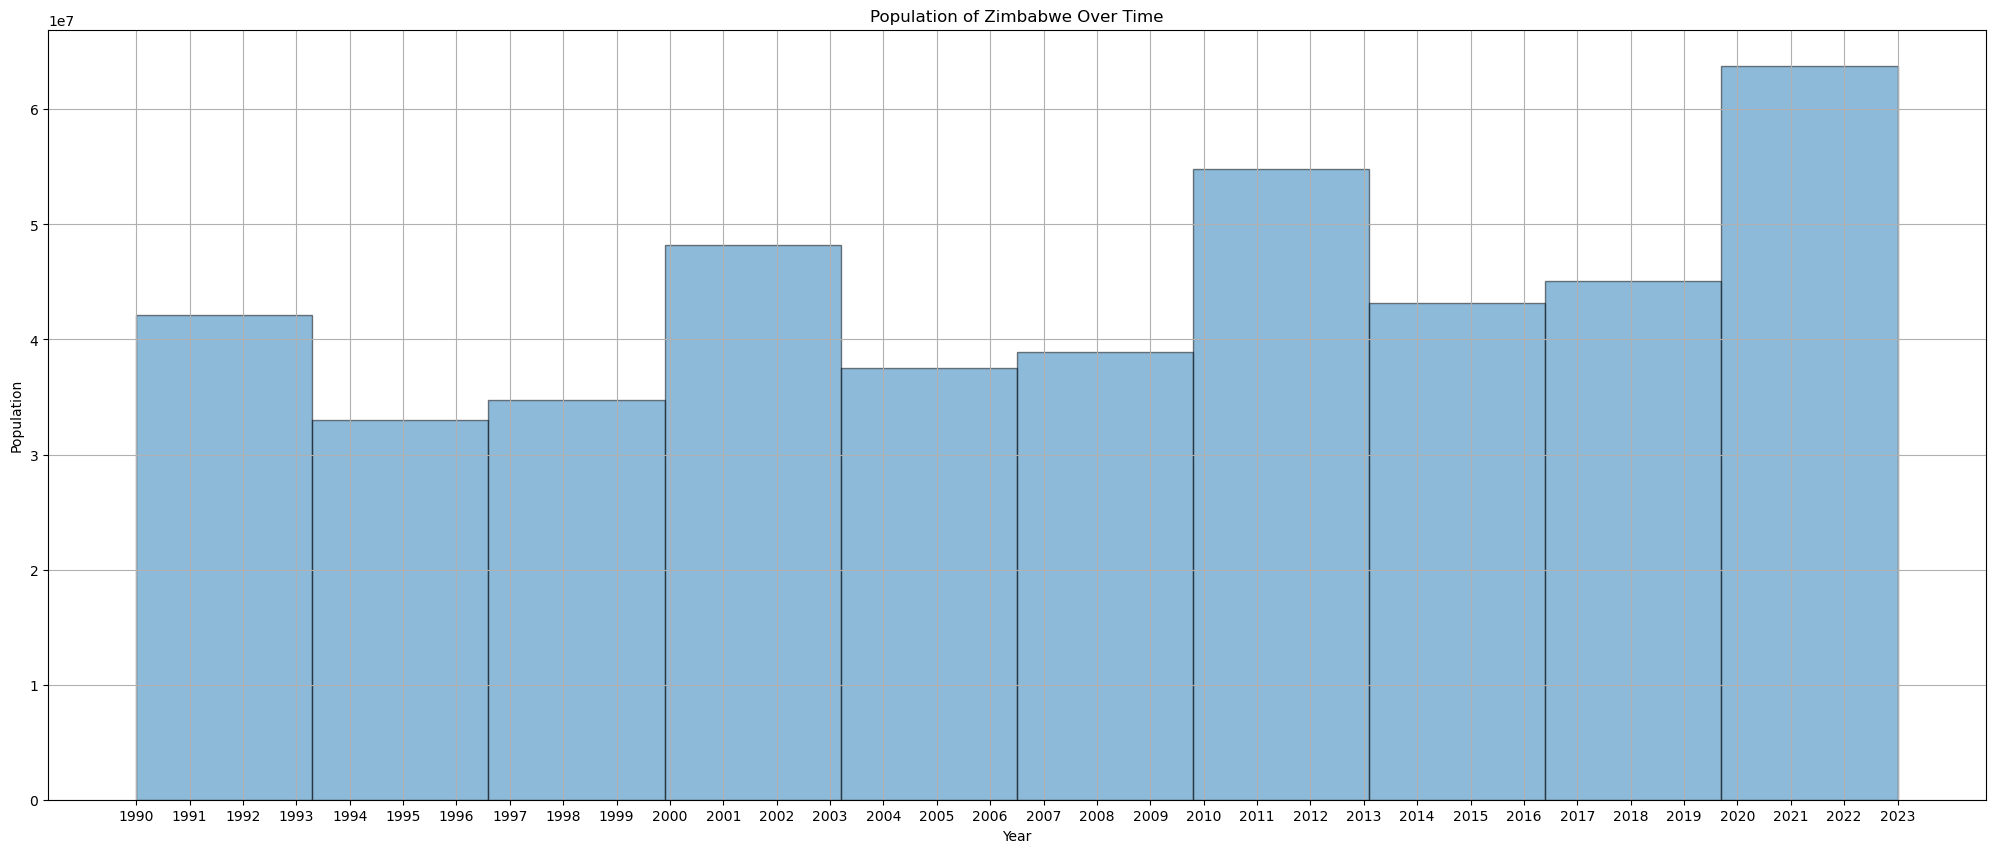

In [21]:
# Plot the histogram with log scale due to wide population range
import matplotlib.cm as cm
cmap = cm.get_cmap('binary')
plt.figure(figsize=(25, 10))
plt.hist(country_table['Year'], weights=country_table['Population'], bins=10, edgecolor='black',alpha=0.5)
# plt.xscale('log')
# plt.yscale('log')
plt.title(f'Population of {Country_name} Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()